In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout, Flatten, Input
from tensorflow.keras import Model, Sequential

In [2]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)

train = datagen.flow_from_directory('dataset', class_mode='categorical', batch_size=16, target_size=(64, 64),
                                    color_mode='grayscale', subset='training')

validation = datagen.flow_from_directory('dataset', class_mode='categorical', batch_size=16, target_size=(64, 64),
                                          color_mode='grayscale', subset='validation')

Found 1168 images belonging to 73 classes.
Found 292 images belonging to 73 classes.


# Модель з єдиним вихідним шаром

In [3]:
model = Sequential()
model.add(Input((64, 64, 1)))
model.add(Flatten())
model.add(Dense(73, kernel_initializer=tf.keras.initializers.RandomNormal(), activation='softmax'))
model.summary()

model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=[tf.keras.metrics.AUC(name='AUC'), tf.keras.metrics.CategoricalAccuracy(name='Accuracy')])
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15),
             tf.keras.callbacks.ModelCheckpoint(filepath='model_1.h5'),
             tf.keras.callbacks.TensorBoard('./logs/model_1', update_freq=1)]             
model.fit(train, validation_data=validation, callbacks=callbacks, epochs=200, verbose=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 73)                299081    
Total params: 299,081
Trainable params: 299,081
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
73/73 - 5s - loss: 6.3228 - AUC: 0.5104 - Accuracy: 0.0205 - val_loss: 6.1186 - val_AUC: 0.4986 - val_Accuracy: 0.0171
Epoch 2/200
73/73 - 2s - loss: 6.1818 - AUC: 0.5361 - Accuracy: 0.0163 - val_loss: 6.7797 - val_AUC: 0.5365 - val_Accuracy: 0.0240
Epoch 3/200
73/73 - 1s - loss: 5.9107 - AUC: 0.5946 - Accuracy: 0.0223 - val_loss: 5.5755 - val_AUC: 0.5794 - val_Accuracy: 0.0240
Epoch 4/200
73/73 - 1s - loss: 5.1720 - AUC: 0.6629 - Accuracy: 0.0368 - val_loss: 6.0299 - val_AUC: 0.5658 - val_Accur

Epoch 59/200
73/73 - 1s - loss: 0.3848 - AUC: 0.9999 - Accuracy: 0.9683 - val_loss: 2.9302 - val_AUC: 0.8584 - val_Accuracy: 0.3082
Epoch 60/200
73/73 - 1s - loss: 0.3698 - AUC: 0.9998 - Accuracy: 0.9675 - val_loss: 2.9139 - val_AUC: 0.8665 - val_Accuracy: 0.3253
Epoch 61/200
73/73 - 2s - loss: 0.3664 - AUC: 0.9999 - Accuracy: 0.9675 - val_loss: 2.8855 - val_AUC: 0.8636 - val_Accuracy: 0.3356
Epoch 62/200
73/73 - 1s - loss: 0.3478 - AUC: 0.9999 - Accuracy: 0.9812 - val_loss: 2.9028 - val_AUC: 0.8559 - val_Accuracy: 0.3390
Epoch 63/200
73/73 - 2s - loss: 0.3455 - AUC: 0.9999 - Accuracy: 0.9700 - val_loss: 2.9044 - val_AUC: 0.8574 - val_Accuracy: 0.3356
Epoch 64/200
73/73 - 1s - loss: 0.3303 - AUC: 0.9999 - Accuracy: 0.9863 - val_loss: 2.8775 - val_AUC: 0.8657 - val_Accuracy: 0.3048
Epoch 65/200
73/73 - 1s - loss: 0.3198 - AUC: 0.9999 - Accuracy: 0.9829 - val_loss: 2.9179 - val_AUC: 0.8617 - val_Accuracy: 0.3014
Epoch 66/200
73/73 - 1s - loss: 0.3152 - AUC: 1.0000 - Accuracy: 0.9820 - va

# Глибока модель з двома шарами ReLU

In [4]:
model = Sequential()
model.add(Input((64, 64, 1)))
model.add(Flatten())
model.add(Dense(128, kernel_initializer=tf.keras.initializers.RandomNormal(), activation='relu'))
model.add(Dense(96, kernel_initializer=tf.keras.initializers.RandomNormal(), activation='relu'))
model.add(Dense(73, kernel_initializer=tf.keras.initializers.RandomNormal(), activation='softmax'))
model.summary()

model.compile(optimizer='sgd', 
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.AUC(name='AUC'), tf.keras.metrics.CategoricalAccuracy(name='Accuracy')])
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15),
             tf.keras.callbacks.ModelCheckpoint(filepath='model_2.h5'),
             tf.keras.callbacks.TensorBoard('./logs/model_2', update_freq=1)]             
model.fit(train, validation_data=validation, callbacks=callbacks, epochs=200, verbose=2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               524416    
_________________________________________________________________
dense_2 (Dense)              (None, 96)                12384     
_________________________________________________________________
dense_3 (Dense)              (None, 73)                7081      
Total params: 543,881
Trainable params: 543,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
73/73 - 3s - loss: 4.3247 - AUC: 0.4916 - Accuracy: 0.0163 - val_loss: 4.2782 - val_AUC: 0.5210 - val_Accuracy: 0.0205
Epoch 2/200
73/73 - 1s - loss: 4.2832 - AUC: 0.5236 - Accuracy: 0.0128 - val_loss: 4.2767 - val_AUC: 0.5097 - val_A

Epoch 57/200
73/73 - 1s - loss: 0.9407 - AUC: 0.9893 - Accuracy: 0.7286 - val_loss: 2.9542 - val_AUC: 0.8725 - val_Accuracy: 0.3425
Epoch 58/200
73/73 - 1s - loss: 0.8656 - AUC: 0.9917 - Accuracy: 0.7509 - val_loss: 2.8266 - val_AUC: 0.8867 - val_Accuracy: 0.3048
Epoch 59/200
73/73 - 1s - loss: 0.8771 - AUC: 0.9898 - Accuracy: 0.7526 - val_loss: 2.7111 - val_AUC: 0.8966 - val_Accuracy: 0.3733
Epoch 60/200
73/73 - 1s - loss: 0.7947 - AUC: 0.9934 - Accuracy: 0.7851 - val_loss: 2.8076 - val_AUC: 0.8896 - val_Accuracy: 0.3938
Epoch 61/200
73/73 - 2s - loss: 0.9562 - AUC: 0.9868 - Accuracy: 0.7491 - val_loss: 2.5497 - val_AUC: 0.9113 - val_Accuracy: 0.4075
Epoch 62/200
73/73 - 1s - loss: 0.7818 - AUC: 0.9930 - Accuracy: 0.7757 - val_loss: 2.7725 - val_AUC: 0.8857 - val_Accuracy: 0.3938
Epoch 63/200
73/73 - 1s - loss: 0.7045 - AUC: 0.9947 - Accuracy: 0.8039 - val_loss: 2.9945 - val_AUC: 0.8846 - val_Accuracy: 0.3390
Epoch 64/200
73/73 - 1s - loss: 0.6865 - AUC: 0.9955 - Accuracy: 0.8125 - va

# Ініціалізація ваг методом He та використання оптимізатора Adam

In [5]:
model = Sequential()
model.add(Input((64, 64, 1)))
model.add(Flatten())
model.add(Dense(128, kernel_initializer=tf.keras.initializers.HeNormal(), activation='relu'))
model.add(Dense(96, kernel_initializer=tf.keras.initializers.HeNormal(), activation='relu'))
model.add(Dense(73, activation='softmax'))
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.01), 
              loss='categorical_crossentropy', 
              metrics=[tf.keras.metrics.AUC(name='AUC'), tf.keras.metrics.CategoricalAccuracy(name='Accuracy')])
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15),
             tf.keras.callbacks.ModelCheckpoint(filepath='model_3.h5'),
             tf.keras.callbacks.TensorBoard('./logs/model_3', update_freq=1)]             
model.fit(train, validation_data=validation, callbacks=callbacks, epochs=200, verbose=2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               524416    
_________________________________________________________________
dense_5 (Dense)              (None, 96)                12384     
_________________________________________________________________
dense_6 (Dense)              (None, 73)                7081      
Total params: 543,881
Trainable params: 543,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
73/73 - 4s - loss: 9.4469 - AUC: 0.4876 - Accuracy: 0.0103 - val_loss: 4.2920 - val_AUC: 0.5001 - val_Accuracy: 0.0137
Epoch 2/200
73/73 - 2s - loss: 4.2995 - AUC: 0.4945 - Accuracy: 0.0086 - val_loss: 4.2918 - val_AUC: 0.5000 - val_A

# Навчання не відбувається через проблему "помираючого ReLU". Застосуємо функцію активації LeakyReLU

In [6]:
model = Sequential()
model.add(Input((64, 64, 1)))
model.add(Flatten())
model.add(Dense(128, kernel_initializer=tf.keras.initializers.HeNormal(), activation=tf.keras.layers.ReLU(negative_slope=0.05)))
model.add(Dense(96, kernel_initializer=tf.keras.initializers.HeNormal(),  activation=tf.keras.layers.ReLU(negative_slope=0.05)))
model.add(Dense(73, activation='softmax'))
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.01), 
              loss='categorical_crossentropy', 
              metrics=[tf.keras.metrics.AUC(name='AUC'), tf.keras.metrics.CategoricalAccuracy(name='Accuracy')])
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15),
             tf.keras.callbacks.ModelCheckpoint(filepath='model_3.h5'),
             tf.keras.callbacks.TensorBoard('./logs/model_3', update_freq=1)]             
model.fit(train, validation_data=validation, callbacks=callbacks, epochs=200, verbose=2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               524416    
_________________________________________________________________
dense_8 (Dense)              (None, 96)                12384     
_________________________________________________________________
dense_9 (Dense)              (None, 73)                7081      
Total params: 543,881
Trainable params: 543,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
73/73 - 5s - loss: 12.2082 - AUC: 0.4916 - Accuracy: 0.0128 - val_loss: 4.5166 - val_AUC: 0.5074 - val_Accuracy: 0.0103
Epoch 2/200
73/73 - 1s - loss: 4.5222 - AUC: 0.4941 - Accuracy: 0.0111 - val_loss: 4.4426 - val_AUC: 0.4966 - val_

# Використаємо менший коефіцієнт навчання

In [7]:
model = Sequential()
model.add(Input((64, 64, 1)))
model.add(Flatten())
model.add(Dense(128, kernel_initializer=tf.keras.initializers.HeNormal(), activation=tf.keras.layers.ReLU(negative_slope=0.05)))
model.add(Dense(96, kernel_initializer=tf.keras.initializers.HeNormal(),  activation=tf.keras.layers.ReLU(negative_slope=0.05)))
model.add(Dense(73, activation='softmax'))
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), 
              loss='categorical_crossentropy', 
              metrics=[tf.keras.metrics.AUC(name='AUC'), tf.keras.metrics.CategoricalAccuracy(name='Accuracy')])
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15),
             tf.keras.callbacks.ModelCheckpoint(filepath='model_4.h5'),
             tf.keras.callbacks.TensorBoard('./logs/model_4', update_freq=1)]             
model.fit(train, validation_data=validation, callbacks=callbacks, epochs=200, verbose=2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               524416    
_________________________________________________________________
dense_11 (Dense)             (None, 96)                12384     
_________________________________________________________________
dense_12 (Dense)             (None, 73)                7081      
Total params: 543,881
Trainable params: 543,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
73/73 - 5s - loss: 4.6568 - AUC: 0.4954 - Accuracy: 0.0197 - val_loss: 4.3589 - val_AUC: 0.5128 - val_Accuracy: 0.0171
Epoch 2/200
73/73 - 1s - loss: 4.3225 - AUC: 0.5044 - Accuracy: 0.0077 - val_loss: 4.2919 - val_AUC: 0.5209 - val_A

Epoch 57/200
73/73 - 2s - loss: 0.4985 - AUC: 0.9970 - Accuracy: 0.8716 - val_loss: 3.0345 - val_AUC: 0.8905 - val_Accuracy: 0.4247
Epoch 58/200
73/73 - 3s - loss: 0.5283 - AUC: 0.9971 - Accuracy: 0.8647 - val_loss: 3.0177 - val_AUC: 0.8916 - val_Accuracy: 0.4247
Epoch 59/200
73/73 - 2s - loss: 0.4754 - AUC: 0.9971 - Accuracy: 0.8776 - val_loss: 2.9131 - val_AUC: 0.8985 - val_Accuracy: 0.4349
Epoch 60/200
73/73 - 2s - loss: 0.4523 - AUC: 0.9972 - Accuracy: 0.8896 - val_loss: 2.9850 - val_AUC: 0.8832 - val_Accuracy: 0.4349
Epoch 61/200
73/73 - 2s - loss: 0.4681 - AUC: 0.9978 - Accuracy: 0.8844 - val_loss: 2.9235 - val_AUC: 0.8917 - val_Accuracy: 0.4589


# Застосуємо L2 регуляризацію

In [3]:
model = Sequential()
model.add(Input((64, 64, 1)))
model.add(Flatten())
model.add(Dense(128, kernel_initializer=tf.keras.initializers.HeNormal(),
                activation=tf.keras.layers.ReLU(negative_slope=0.05)))
model.add(Dense(96, kernel_initializer=tf.keras.initializers.HeNormal(),
                activation=tf.keras.layers.ReLU(negative_slope=0.05)))
model.add(Dense(73, kernel_regularizer=tf.keras.regularizers.l2(), activation='softmax'))
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), 
              loss='categorical_crossentropy', 
              metrics=[tf.keras.metrics.AUC(name='AUC'), tf.keras.metrics.CategoricalAccuracy(name='Accuracy')])
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15),
             tf.keras.callbacks.ModelCheckpoint(filepath='model_5.h5'),
             tf.keras.callbacks.TensorBoard('./logs/model_5', update_freq=1)]             
model.fit(train, validation_data=validation, callbacks=callbacks, epochs=200, verbose=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               524416    
_________________________________________________________________
dense_1 (Dense)              (None, 96)                12384     
_________________________________________________________________
dense_2 (Dense)              (None, 73)                7081      
Total params: 543,881
Trainable params: 543,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
73/73 - 4s - loss: 5.3193 - AUC: 0.5115 - Accuracy: 0.0163 - val_loss: 4.9801 - val_AUC: 0.4952 - val_Accuracy: 0.0171
Epoch 2/200
73/73 - 1s - loss: 4.9194 - AUC: 0.4896 - Accuracy: 0.0154 - val_loss: 4.8301 - val_AUC: 0.4997 - val_Acc

# Застосуємо пакетну нормалізацію

In [4]:
model = Sequential()
model.add(Input((64, 64, 1)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, kernel_initializer=tf.keras.initializers.HeNormal(), activation=tf.keras.layers.ReLU(negative_slope=0.05)))
model.add(BatchNormalization())
model.add(Dense(96, kernel_initializer=tf.keras.initializers.HeNormal(), activation=tf.keras.layers.ReLU(negative_slope=0.05)))
model.add(BatchNormalization())
model.add(Dense(73, activation='softmax'))
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), 
              loss='categorical_crossentropy', 
              metrics=[tf.keras.metrics.AUC(name='AUC'), tf.keras.metrics.CategoricalAccuracy(name='Accuracy')])
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15),
             tf.keras.callbacks.ModelCheckpoint(filepath='model_6.h5'),
             tf.keras.callbacks.TensorBoard('./logs/model_6', update_freq=1)]             
model.fit(train, validation_data=validation, callbacks=callbacks, epochs=200, verbose=2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 4096)              16384     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               524416    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_4 (Dense)              (None, 96)                12384     
_________________________________________________________________
batch_normalization_2 (Batch (None, 96)                384       
_________________________________________________________________
dense_5 (Dense)              (None, 73)               

# Застосуємо Dropout

In [5]:
model = Sequential()
model.add(Input((64, 64, 1)))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(128, kernel_initializer=tf.keras.initializers.HeNormal(), activation=tf.keras.layers.ReLU(negative_slope=0.05)))
model.add(Dropout(0.4))
model.add(Dense(96, kernel_initializer=tf.keras.initializers.HeNormal(), activation=tf.keras.layers.ReLU(negative_slope=0.05)))
model.add(Dense(73, activation='softmax'))
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), 
              loss='categorical_crossentropy', 
              metrics=[tf.keras.metrics.AUC(name='AUC'), tf.keras.metrics.CategoricalAccuracy(name='Accuracy')])
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15),
             tf.keras.callbacks.ModelCheckpoint(filepath='model_7.h5'),
             tf.keras.callbacks.TensorBoard('./logs/model_7', update_freq=1)]             
model.fit(train, validation_data=validation, callbacks=callbacks, epochs=200, verbose=2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               524416    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 96)                12384     
_________________________________________________________________
dense_8 (Dense)              (None, 73)                7081      
Total params: 543,881
Trainable params: 543,881
Non-trainable params: 0
________________________________________________

Epoch 55/200
73/73 - 1s - loss: 3.8275 - AUC: 0.7570 - Accuracy: 0.0719 - val_loss: 3.8380 - val_AUC: 0.7557 - val_Accuracy: 0.0925
Epoch 56/200
73/73 - 2s - loss: 3.8358 - AUC: 0.7567 - Accuracy: 0.0736 - val_loss: 3.7085 - val_AUC: 0.8013 - val_Accuracy: 0.1130
Epoch 57/200
73/73 - 1s - loss: 3.7426 - AUC: 0.7789 - Accuracy: 0.0925 - val_loss: 3.6316 - val_AUC: 0.8155 - val_Accuracy: 0.0993
Epoch 58/200
73/73 - 1s - loss: 3.7699 - AUC: 0.7756 - Accuracy: 0.0779 - val_loss: 3.7025 - val_AUC: 0.8033 - val_Accuracy: 0.1062
Epoch 59/200
73/73 - 2s - loss: 3.6797 - AUC: 0.7902 - Accuracy: 0.0856 - val_loss: 3.6287 - val_AUC: 0.8123 - val_Accuracy: 0.0890
Epoch 60/200
73/73 - 2s - loss: 3.6994 - AUC: 0.7879 - Accuracy: 0.0771 - val_loss: 3.7983 - val_AUC: 0.7670 - val_Accuracy: 0.0685
Epoch 61/200
73/73 - 1s - loss: 3.7095 - AUC: 0.7862 - Accuracy: 0.0822 - val_loss: 3.7891 - val_AUC: 0.7683 - val_Accuracy: 0.0959
Epoch 62/200
73/73 - 2s - loss: 3.6235 - AUC: 0.8022 - Accuracy: 0.0813 - va

Epoch 117/200
73/73 - 1s - loss: 2.7367 - AUC: 0.9067 - Accuracy: 0.2757 - val_loss: 3.0118 - val_AUC: 0.8784 - val_Accuracy: 0.2705
Epoch 118/200
73/73 - 1s - loss: 2.6946 - AUC: 0.9032 - Accuracy: 0.2791 - val_loss: 2.9515 - val_AUC: 0.8907 - val_Accuracy: 0.2705
Epoch 119/200
73/73 - 1s - loss: 2.7050 - AUC: 0.9069 - Accuracy: 0.2697 - val_loss: 2.8792 - val_AUC: 0.8883 - val_Accuracy: 0.2740
Epoch 120/200
73/73 - 2s - loss: 2.6537 - AUC: 0.9124 - Accuracy: 0.2851 - val_loss: 2.8977 - val_AUC: 0.8857 - val_Accuracy: 0.2603
Epoch 121/200
73/73 - 2s - loss: 2.6447 - AUC: 0.9127 - Accuracy: 0.2817 - val_loss: 2.8899 - val_AUC: 0.8910 - val_Accuracy: 0.2911
Epoch 122/200
73/73 - 2s - loss: 2.6449 - AUC: 0.9074 - Accuracy: 0.2877 - val_loss: 2.8813 - val_AUC: 0.8969 - val_Accuracy: 0.3014
Epoch 123/200
73/73 - 2s - loss: 2.6534 - AUC: 0.9125 - Accuracy: 0.2671 - val_loss: 2.8541 - val_AUC: 0.8929 - val_Accuracy: 0.2911
Epoch 124/200
73/73 - 2s - loss: 2.5894 - AUC: 0.9118 - Accuracy: 0.3

Epoch 179/200
73/73 - 2s - loss: 2.0710 - AUC: 0.9420 - Accuracy: 0.4281 - val_loss: 2.4948 - val_AUC: 0.9143 - val_Accuracy: 0.3767
Epoch 180/200
73/73 - 2s - loss: 2.0541 - AUC: 0.9452 - Accuracy: 0.4375 - val_loss: 2.5359 - val_AUC: 0.9101 - val_Accuracy: 0.3699
Epoch 181/200
73/73 - 2s - loss: 2.0836 - AUC: 0.9420 - Accuracy: 0.4332 - val_loss: 2.5902 - val_AUC: 0.9082 - val_Accuracy: 0.3904
Epoch 182/200
73/73 - 2s - loss: 2.0852 - AUC: 0.9450 - Accuracy: 0.4127 - val_loss: 2.5236 - val_AUC: 0.9111 - val_Accuracy: 0.3836
Epoch 183/200
73/73 - 2s - loss: 2.0765 - AUC: 0.9433 - Accuracy: 0.4161 - val_loss: 2.4707 - val_AUC: 0.9138 - val_Accuracy: 0.4144
Epoch 184/200
73/73 - 2s - loss: 2.0657 - AUC: 0.9398 - Accuracy: 0.4478 - val_loss: 2.4965 - val_AUC: 0.9128 - val_Accuracy: 0.3527
Epoch 185/200
73/73 - 3s - loss: 2.0844 - AUC: 0.9456 - Accuracy: 0.4144 - val_loss: 2.4454 - val_AUC: 0.9198 - val_Accuracy: 0.3904
Epoch 186/200
73/73 - 2s - loss: 2.0547 - AUC: 0.9482 - Accuracy: 0.4

# Розпізнаємо нові зображення

In [48]:
import glob
import matplotlib.pyplot as plt
import numpy as np


model = tf.keras.models.load_model('model_7.h5', custom_objects={'ReLU': tf.keras.layers.ReLU()})

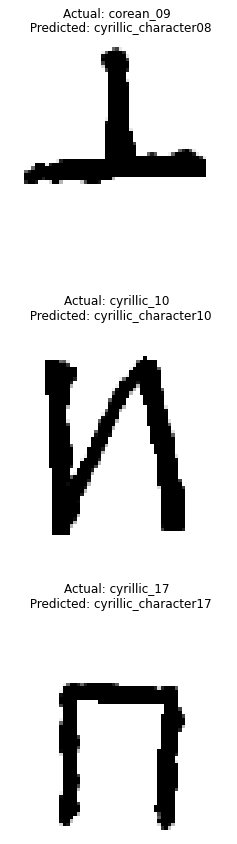

In [47]:
images = glob.glob('custom/*')
class_names = list(train.class_indices.keys())
fig, axes = plt.subplots(len(images), 1, figsize=(4, 15))
for path, ax in zip(images, axes):
    image = tf.keras.preprocessing.image.load_img(path, target_size=(64, 64), color_mode='grayscale')
    image_arr = tf.keras.preprocessing.image.img_to_array(image)
    image_arr /= 255.
    pred = model.predict(np.array([image_arr]))
    ax.imshow(image_arr, cmap='gray')
    actual = path.split("\\")[1][:-4]
    title = f'Actual: {actual} \n Predicted: {class_names[np.argmax(pred)]}'
    ax.set_title(title)
    ax.set_axis_off()